<a href="https://colab.research.google.com/github/richardchen1210/licha/blob/master/stock_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install ta
!pip install mpl_finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 892 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29104 sha256=8a422872fb0e8f1c39030f4026fe061b71f06b33aa1143c7570d489bd3181fef
  Stored in directory: /root/.cache/pip/wheels/31/31/f1/f2ff471bbc5b84a4b973698ceecdd453ae043971791adc3431
Successfully built ta
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import ta
import pandas as pd
import yfinance as yf
import mpl_finance as mpf
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
import csv

with open("stocks_code.csv","r") as f:
    csvReader = csv.reader(f) # 讀取資料存於物件 此物件內容是list [[A,B],[C,D],...]
    dict_code = dict(csvReader) # 把csvReader物件轉成dict

dict_code

{'1101': '台泥',
 '1102': '亞泥',
 '1103': '嘉泥',
 '1104': '環泥',
 '1108': '幸福',
 '1109': '信大',
 '1110': '東泥',
 '1201': '味全',
 '1203': '味王',
 '1210': '大成',
 '1213': '大飲',
 '1215': '卜蜂',
 '1216': '統一',
 '1217': '愛之味',
 '1218': '泰山',
 '1219': '福壽',
 '1220': '台榮',
 '1225': '福懋油',
 '1227': '佳格',
 '1229': '聯華',
 '1231': '聯華食',
 '1232': '大統益',
 '1233': '天仁',
 '1234': '黑松',
 '1235': '興泰',
 '1236': '宏亞',
 '1256': '鮮活果汁-KY',
 '1301': '台塑',
 '1303': '南亞',
 '1304': '台聚',
 '1305': '華夏',
 '1307': '三芳',
 '1308': '亞聚',
 '1309': '台達化',
 '1310': '台苯',
 '1312': '國喬',
 '1313': '聯成',
 '1314': '中石化',
 '1315': '達新',
 '1316': '上曜',
 '1319': '東陽',
 '1321': '大洋',
 '1323': '永裕',
 '1324': '地球',
 '1325': '恆大',
 '1326': '台化',
 '1337': '再生-KY',
 '1338': '廣華-KY',
 '1339': '昭輝',
 '1340': '勝悅-KY',
 '1341': '富林-KY',
 '1342': '八貫',
 '1402': '遠東新',
 '1409': '新纖',
 '1410': '南染',
 '1413': '宏洲',
 '1414': '東和',
 '1416': '廣豐',
 '1417': '嘉裕',
 '1418': '東華',
 '1419': '新紡',
 '1423': '利華',
 '1432': '大魯閣',
 '1434': '福懋',
 '1435': '中福',


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.mkdir("/content/drive/MyDrive/Rest")
for i in range(5):
    path = f"/content/drive/MyDrive/Rest/{i}"
    os.mkdir(path)

In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-09-10 14:50:30--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.2.113, 142.251.2.102, 142.251.2.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g31mvqco56h1u4cvq3eq63bjfkarct1b/1662821400000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=3be99b87-6504-4634-99cb-4fff30d0a668 [following]
--2022-09-10 14:50:34--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g31mvqco56h1u4cvq3eq63bjfkarct1b/1662821400000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=3be99b87-6504-4634-99cb-4fff30d0a668
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to doc-0k-9o-d

In [ ]:
# 爬得2330台積電從2022-01-01到2022-09-07的開高低收 history(period = "max")取得全部資料
# df = yf.Ticker("2330.TW").history(start = "2021-07-01",end = "2022-09-07")
# yf.download("股票代號", period = 日期範圍(1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max), interval = 頻率(1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo))
# yf.download("2330.TW", start = "2022-01-01",end = "2022-09-07") #或
stock_ind = 2303
df = yf.download(f"{stock_ind}.TW", period ="2y", interval = "1d")
df = df[-280:]
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-22,51.099998,52.799999,50.799999,52.000000,48.835701,233158928
2021-07-23,53.000000,54.099998,52.700001,52.700001,49.493103,207930876
2021-07-26,54.000000,54.400002,53.599998,53.700001,50.432251,137614648
2021-07-27,54.200001,54.299999,53.099998,53.099998,49.868759,118407516
2021-07-28,52.400002,52.599998,50.500000,51.799999,48.647869,199661413
...,...,...,...,...,...,...
2022-09-02,40.599998,40.849998,40.299999,40.500000,40.500000,49625651
2022-09-05,40.299999,40.500000,39.250000,39.799999,39.799999,88728180
2022-09-06,39.950001,40.200001,39.750000,39.950001,39.950001,38130526


In [ ]:
df.index

DatetimeIndex(['2021-07-22', '2021-07-23', '2021-07-26', '2021-07-27',
               '2021-07-28', '2021-07-29', '2021-07-30', '2021-08-02',
               '2021-08-03', '2021-08-04',
               ...
               '2022-08-26', '2022-08-29', '2022-08-30', '2022-08-31',
               '2022-09-01', '2022-09-02', '2022-09-05', '2022-09-06',
               '2022-09-07', '2022-09-08'],
              dtype='datetime64[ns]', name='Date', length=280, freq=None)

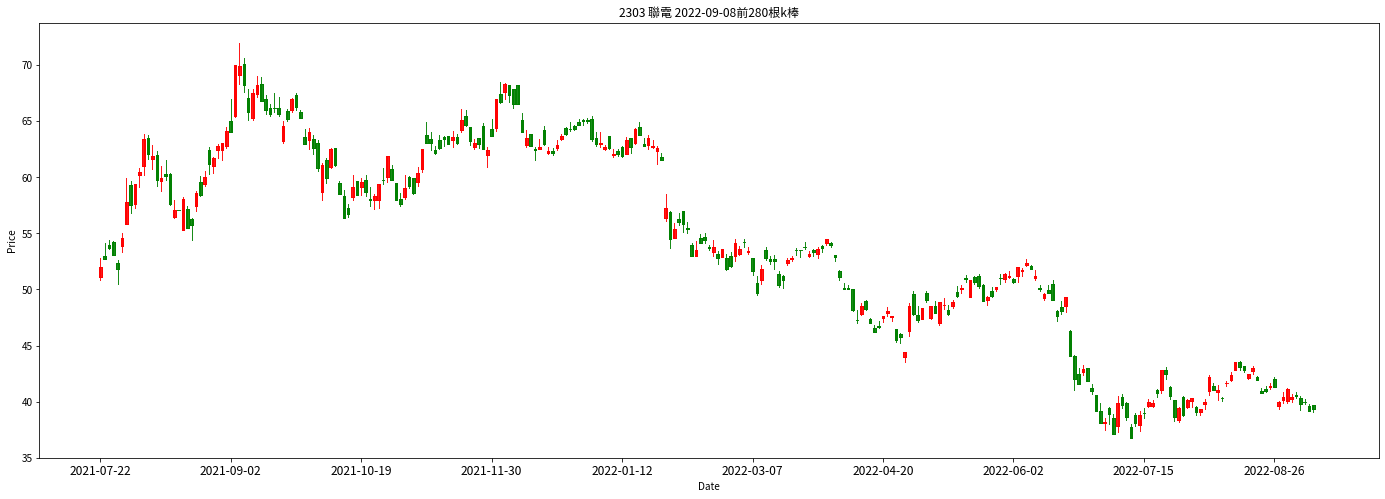

In [ ]:
fig = plt.figure(figsize=(24,8))  # 設定畫布大小(橫,直)
ax = fig.add_subplot(1,1,1) # 等份切割畫布(直向,橫向,指定圖要放的位置) 假設切割成(2,3,1) 意指切成如2x3的陣列 位置編號[[1,2,3],[4,5,6]] 圖放在1號位置
ax.set_xticks(range(0,len(df.index),30)) # 設定刻度 此為每30筆資料為一格
#把日期後的時間刪掉(原始:2022-05-03 00:00:00) 只剩日期(2022-05-03) 由於資料量很多所有日期都顯示會擠在一起 所以只顯示每30天的日期
convert_date = pd.DataFrame(df.index[::30])["Date"].apply(lambda x: x.strftime("%Y-%m-%d"))
ax.set_xticklabels(convert_date, fontsize = 12) # x座標名稱
# 繪製k線圖或稱蠟燭圖 主體(粗)端點代表開盤與收盤價 引線(細)的端點代表最高或最低
# width 主體寬度  alpha 透明度  在台灣紅色(俗稱上漲 colorup="r")的由上到下:高收開低 綠色(下跌 color="g"):高開收低 (美國顏色相反)
mpf.candlestick2_ochl(ax,df["Open"],df["Close"],df["High"],df["Low"],width = 0.6, colorup = "r", colordown = "g", alpha = 0.9)
# 另有參數 rotation = 90 表刻度文字旋轉90度

last_date = df.index[-1].strftime("%Y-%m-%d")
plt.title(f"{stock_ind} {dict_code[str(stock_ind)]} {last_date}前280根k棒") # 標題名稱
plt.xlabel("Date") # x軸標題
plt.ylabel("Price") # y軸標題
plt.savefig(f"{stock_ind}.png") # 要放在show前面 否則會變空圖
plt.show() # show圖


In [ ]:
pd.DataFrame(df.index[::30])["Date"]

NameError: ignored